IMAGE CLASSIFICATION USING NEURAL NETWORKS

Neural Networks (NN): 
Neural Networks are computational models that mimic the complex functions of the human brain. The neural networks consist of interconnected nodes or neurons that process and learn from data. It pplies a transformation (like a weighted sum followed by an activation function), and passes the output to the next layer, enabling tasks such as pattern recognition and decision making in machine learning.

A Multi-Layer Perceptron (MLP)
A Multi-Layer Perceptron consists of fully connected dense layers that transform input data from one dimension to another. It is called “multi-layer” because it contains an input layer, one or more hidden layers, and an output layer. However, MLPs aren't ideal for image data due to their inability to capture spatial relationships in images. 
Uses for images: MLPs can be used for image classification but are less efficient compared to more specialized models like CNNs, as they don't capture the spatial structure of images well.

Convolutional Neural Networks (CNN):
Convolutional Neural Network (CNN) is the extended version of artificial neural networks (ANN) which is predominantly used to extract the feature from the grid-like matrix dataset.Convolutional Neural Network (CNN) is the extended version of artificial neural networks (ANN) which is predominantly used to extract the feature from the grid-like matrix dataset.
Uses for images: CNNs are widely used for tasks such as image classification, object detection, image segmentation, and facial recognition. They excel at automatically learning important features like shapes, textures, and patterns, which makes them the go-to architecture for image-based applications.

1. SETTING UP ENVIRONMENT

Establishing a TensorFlow and Keras environment for Convolutional Neural Network (CNN) construction and training.
i. TensorFlow: For bulding and training the learning models.
ii. Keras: USed to define the CNN arcitechture
iii.Callbacks: To monitor training process, save models, stop early if overfitting is detected.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


In [ ]:
data_path = "C://Users//Asus//Desktop//CNN//images"

Defining batch size, image size and seed value for reproducibility.

In [3]:
batch_size = 32
img_width, img_height = 128, 128
seed = 123


The 'image_dataset_from_directory' function in TensorFlow's Keras API is a convenient way to load and preprocess image datasets stored in a directory structure.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_width, img_height),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_width, img_height),
    batch_size=batch_size
)

# Class names
class_names = train_ds.class_names
print("Class Names: ", class_names)


Found 4086 files belonging to 47 classes.
Using 3269 files for training.
Found 4086 files belonging to 47 classes.
Using 817 files for validation.
Class Names:  ['acerola', 'apple', 'banana', 'beetroot', 'bell pepper', 'bitter_gourd', 'brazil_nut', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'custard_apple', 'eggplant', 'elderberry', 'feijoa', 'garlic', 'ginger', 'gooseberry', 'grapes', 'jalepeno', 'jujube', 'kiwi', 'lablab', 'lemon', 'lettuce', 'mandarine', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'raspberry', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [5]:
for images, labels in train_ds.take(1):  # Take one batch
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (32, 128, 128, 3)
Label batch shape: (32,)


Using caching, shuffling, and prefetching for parallel data loading, this method optimises input pipeline speed and preprocesses the datasets by normalising image pixel values to the range [0, 1]. During training and validation, it guarantees effective data feeding.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(ds):
    normalization_layer = layers.Rescaling(1.0 / 255)
    ds = ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
    return ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

train_ds = preprocess(train_ds)
val_ds = preprocess(val_ds)


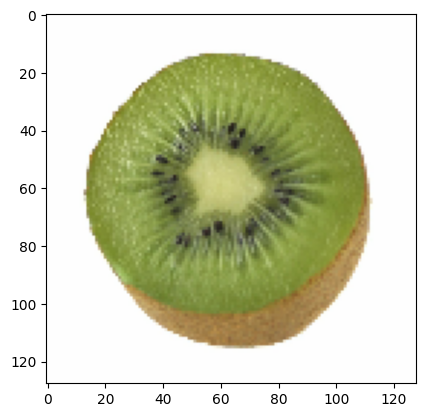

kiwi


In [7]:
for images, labels in train_ds.take(1): 
    plt.imshow(images[0].numpy(), cmap="binary")
    #plt.axis('off')
    plt.show()
    print(class_names[labels[0].numpy().astype("uint8")])

In [8]:
for images, labels in train_ds.take(1): 
    print(images[0])

tf.Tensor(
[[[0.3432598  0.31875002 0.27855393]
  [0.32346815 0.28817403 0.25287992]
  [0.3444853  0.31703433 0.27781865]
  ...
  [0.5445466  0.5602329  0.5563113 ]
  [0.5526961  0.5683824  0.5644608 ]
  [0.57953435 0.5952206  0.59129906]]

 [[0.346201   0.3216912  0.28149512]
  [0.34264708 0.31127453 0.26372552]
  [0.3481005  0.3245711  0.2731005 ]
  ...
  [0.5644608  0.5801471  0.5762255 ]
  [0.58118874 0.596875   0.59295344]
  [0.57787997 0.59356624 0.5896447 ]]

 [[0.33915442 0.32346815 0.28229168]
  [0.33903188 0.31550246 0.26844364]
  [0.34509805 0.31764707 0.2784314 ]
  ...
  [0.5676471  0.5833334  0.5794118 ]
  [0.59736526 0.61305153 0.60912997]
  [0.6061275  0.62573534 0.61004907]]

 ...

 [[0.5758579  0.5954657  0.6072304 ]
  [0.6056373  0.6213236  0.6330883 ]
  [0.50618875 0.5375613  0.549326  ]
  ...
  [0.59724265 0.612929   0.6090074 ]
  [0.52500004 0.5406863  0.53676474]
  [0.591728   0.60741425 0.6034927 ]]

 [[0.6218138  0.63750005 0.64926475]
  [0.5112745  0.5230392  0

To improve dataset diversity, the data_augmentation layer uses random modifications like flipping, rotation, zooming, contrast, and translation. It simulates a variety of data possibilities, which increases model robustness.

In [ ]:

data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2),
        layers.RandomTranslation(0.2, 0.2)
    ],
    name="data_augmentation"
)


Printing the augmented image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0380641].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0316752].


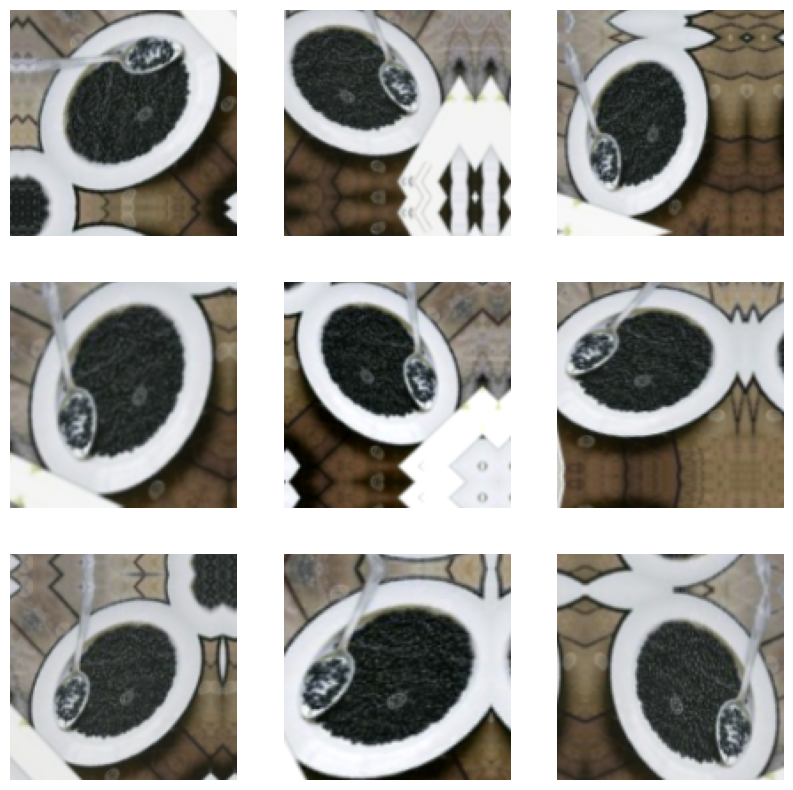

In [10]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images)[0].numpy()
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image)
        plt.axis("off")
plt.show()


MULTI LAYER PERCEPTRON

Create, build, train, and assess an image classification Multilayer Perceptron (MLP) model.

Model Definition:
The model's architecture is straightforward and fully connected.
Images are flattened into 1D vectors. ReLU activation is used to create two fully connected layers with 128 and 64 units. Dropout reduces overfitting by adding regularisation. A softmax layer for classification over num_classes is the output layer.

Compilation:
Adam is the adaptive learning rate optimiser. For labels encoded with integers, the loss function is sparse_categorical_crossentropy. Metric monitors accuracy throughout validation and training.

Evaluation: The model is evaluated on val_ds, and the final validation accuracy is printed.



In [ ]:
num_classes = len(class_names)


model = Sequential([
    data_augmentation,
    layers.Flatten(input_shape=(img_height, img_width, 3)),  # Flatten the images
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    #layers.Dense(32, activation='relu'),
    #layers.Dropout(0.1),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy since labels are integers
    metrics=['accuracy']
)

# Train the model
MLP_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ModelCheckpoint("best_mlp_model.keras", monitor='val_loss', save_best_only=True),
        ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=1e-5)
    ]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(val_ds, verbose=0)
print("Validation accuracy:" , test_acc)


Epoch 1/20


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.0230 - loss: 7.9865 - val_accuracy: 0.0171 - val_loss: 3.8507 - learning_rate: 0.0010
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.0260 - loss: 3.8493 - val_accuracy: 0.0171 - val_loss: 3.8510 - learning_rate: 0.0010
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.0227 - loss: 3.8485 - val_accuracy: 0.0171 - val_loss: 3.8514 - learning_rate: 0.0010
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.0304 - loss: 3.8477 - val_accuracy: 0.0171 - val_loss: 3.8517 - learning_rate: 0.0010
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.0261 - loss: 3.8473 - val_accuracy: 0.0171 - val_loss: 3.8518 - learning_rate: 2.0000e-04
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.0232 - loss: 3.8471 - val_accuracy: 0.0171 - val_loss: 3.8519 - learning_rate: 2.0000e-04
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.0235 -

Plotting the validation-accuracy graphs for MLP.

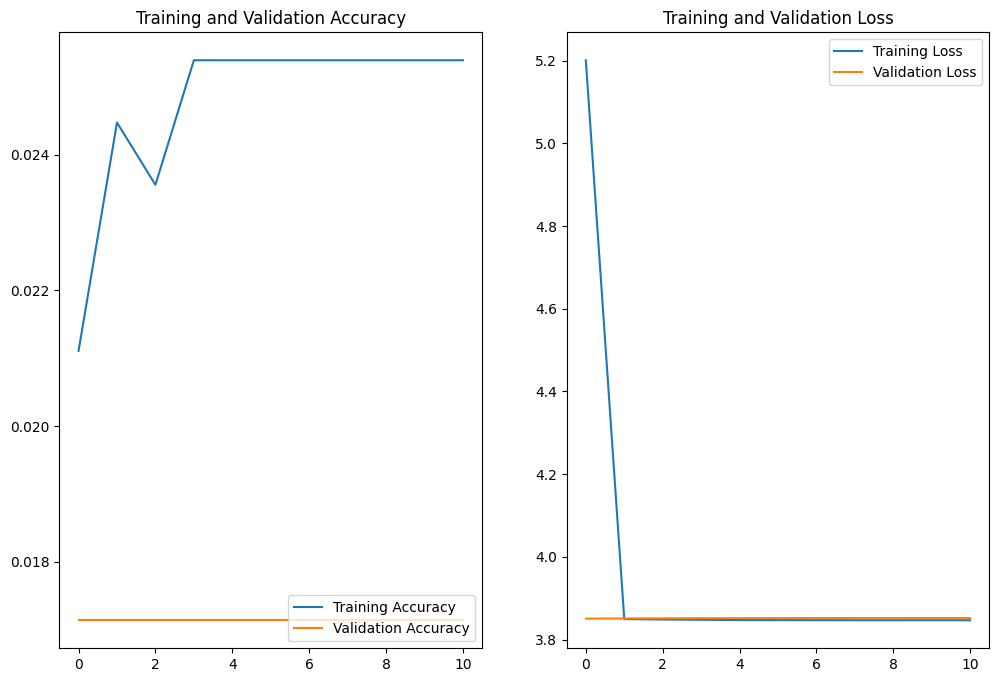

In [15]:
def plot_training(MLP_history):
    acc = MLP_history.history['accuracy']
    val_acc = MLP_history.history['val_accuracy']
    loss = MLP_history.history['loss']
    val_loss = MLP_history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training(MLP_history)


CONVOLUTIONAL NEURAL NETWORK

 A CNN with 3 convolutional layers (128, 64, 32 filters), max-pooling, dropout for regularization, and a fully connected layer for classification. The final softmax layer outputs probabilities for the len(class_names) classes.

In [16]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(128, (3, 3),strides = 2, activation='relu', input_shape=(img_width, img_height, 3)),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3),strides = 2,  activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),

    layers.Conv2D(32, (3, 3), strides = 1, activation='relu'),
    #layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),

    #layers.Conv2D(32, (3, 3), strides = 1, activation='relu'),
    #layers.BatchNormalization(),
    #layers.MaxPooling2D(2, 2),
    #layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    #layers.BatchNormalization(),
    #layers.Dropout(0.1),
    layers.Dense(len(class_names), activation='softmax')  # Match number of classes
])


The model is compiled here.
Adam is an optimiser for effective learning with variable learning rates.
Sparse_categorical_crossentropy is a loss function that works well for classification jobs with integer labels.
Metrics monitors precision during training and assessment.








In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Printing the summary of the CNN

In [18]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 63, 63, 128)      │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 31, 31, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (32, 31, 31, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 15, 15, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 7, 7, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (32, 7, 7, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 5, 5, 32)         │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (32, 2, 2, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 128)              │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 47)               │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,415 (462.56 KB)

 Trainable params: 118,415 (462.56 KB)

 Non-trainable params: 0 (0.00 B)

In order to train the model, create a list of callbacks:

i.TensorBoard: Stores training data in the logs directory for TensorBoard visualisation.
ii.EarlyStopping: Restores the optimal weights and ends training if the validation loss doesn't improve after five epochs.
iii.ModelCheckpoint: Saves best_model.keras, the model with the best validation loss.
If the validation accuracy does not increase after three epochs, ReduceLROnPlateau lowers the learning rate by a factor of 0.2, with a minimum learning rate of 1e-4.


In [ ]:
log_dir = "logs"
callbacks = [
     TensorBoard(log_dir=log_dir),
     EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
     ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True),
     ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=1e-4)
     ]


This function applies the designated callbacks and uses val_ds for validation while training the model for 50 epochs on the train_ds. The history object records the training progress, including accuracy and loss.

In [20]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.0234 - loss: 4.7538 - val_accuracy: 0.0306 - val_loss: 3.9205 - learning_rate: 0.0010
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.0609 - loss: 3.7267 - val_accuracy: 0.1065 - val_loss: 3.4305 - learning_rate: 0.0010
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.1215 - loss: 3.3089 - val_accuracy: 0.1469 - val_loss: 3.1720 - learning_rate: 0.0010
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.1306 - loss: 3.1665 - val_accuracy: 0.1371 - val_loss: 2.9833 - learning_rate: 0.0010
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.1593 - loss: 3.0572 - val_accuracy: 0.1836 - val_loss: 2.9641 - learning_rate: 0.0010
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.1646 - loss: 2.9754 - val_accuracy: 0.1775 - val_loss: 2.8431 - learning_rate: 0.0010
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.1

Plotting the validation-accuracy graphs for CNN.


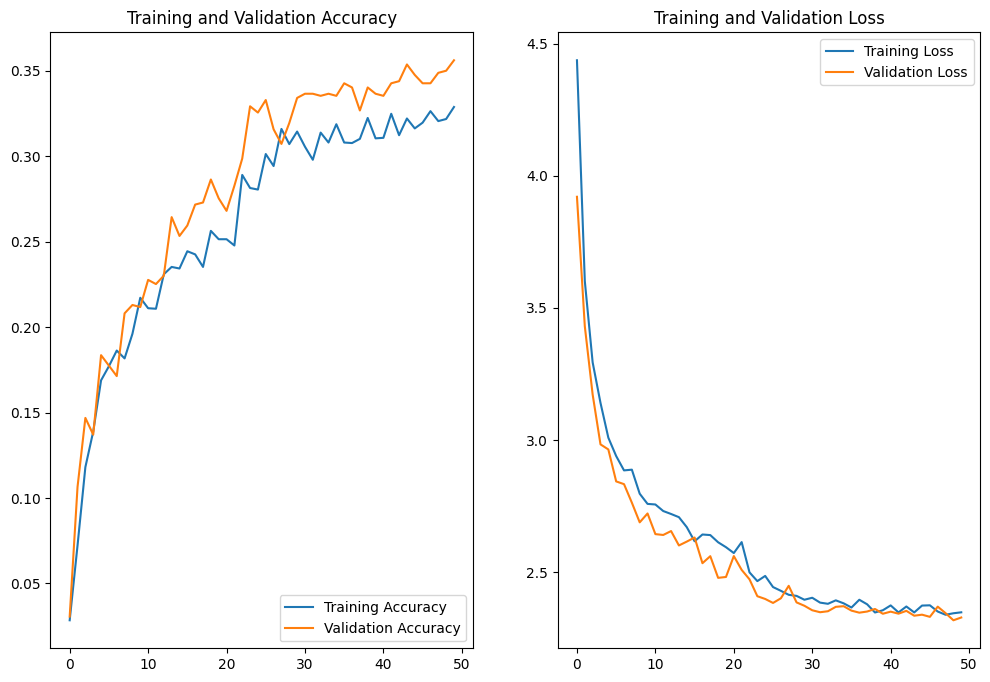

In [21]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training(history)


In order to plot comparison, this code shifts the training curve by -0.5 epochs while visualising the training and validation curves. 


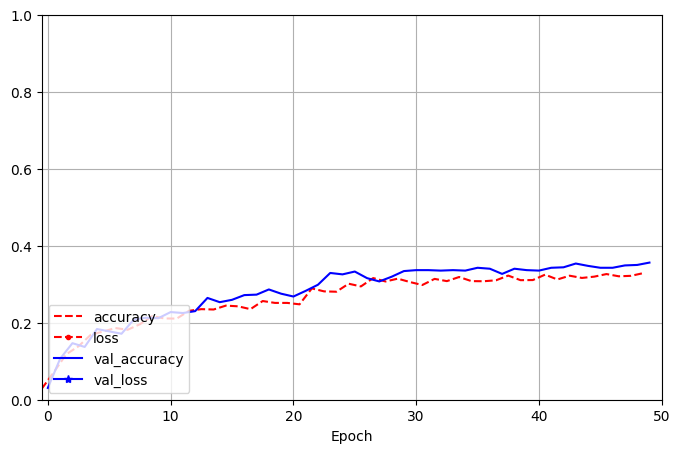

In [ ]:
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 50, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

Evaluate the model's performance by generating and visualizing a confusion matrix for the predictions made on the validation dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


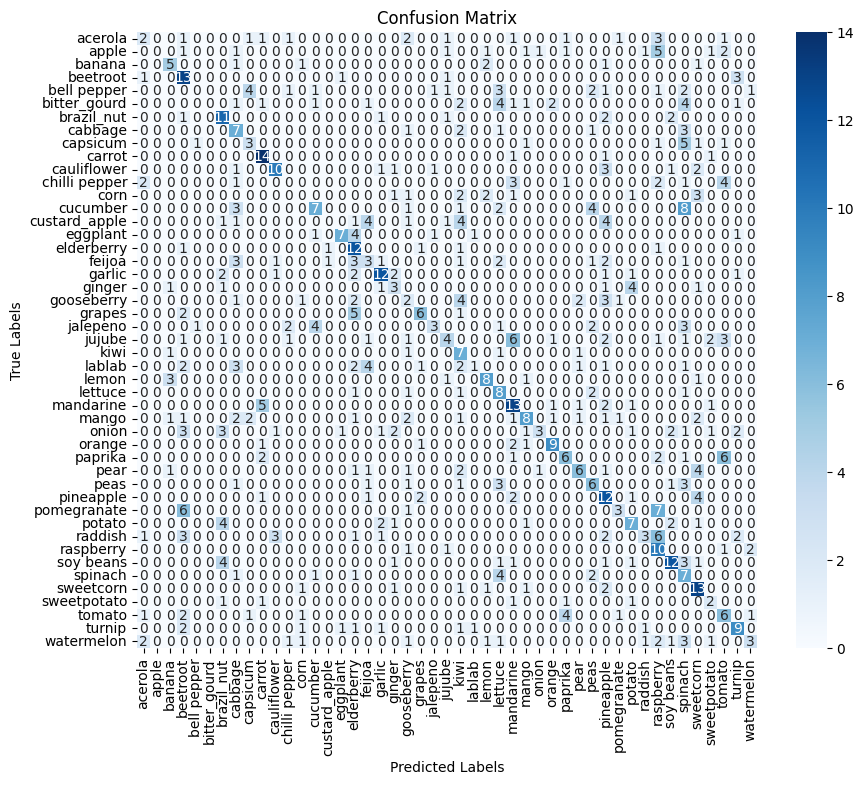

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# %% 
# Get predictions and true labels from the validation dataset
y_true = []
y_pred = []

# Iterate over the validation dataset and collect true and predicted labels
for images, labels in val_ds:
    # Make predictions with the CNN model
    preds = model.predict(images)  # Using TensorFlow model's prediction
    preds = np.argmax(preds, axis=-1)  # Convert predictions to class labels
    
    # Append the true and predicted labels
    y_true.extend(labels.numpy())  # Convert tensor to NumPy array
    y_pred.extend(preds)          # Store the predicted labels

# Convert to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# %% 
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# %% 
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()



Generate and Visualize multi-class ROC curves for the model's predictions on the validation dataset. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


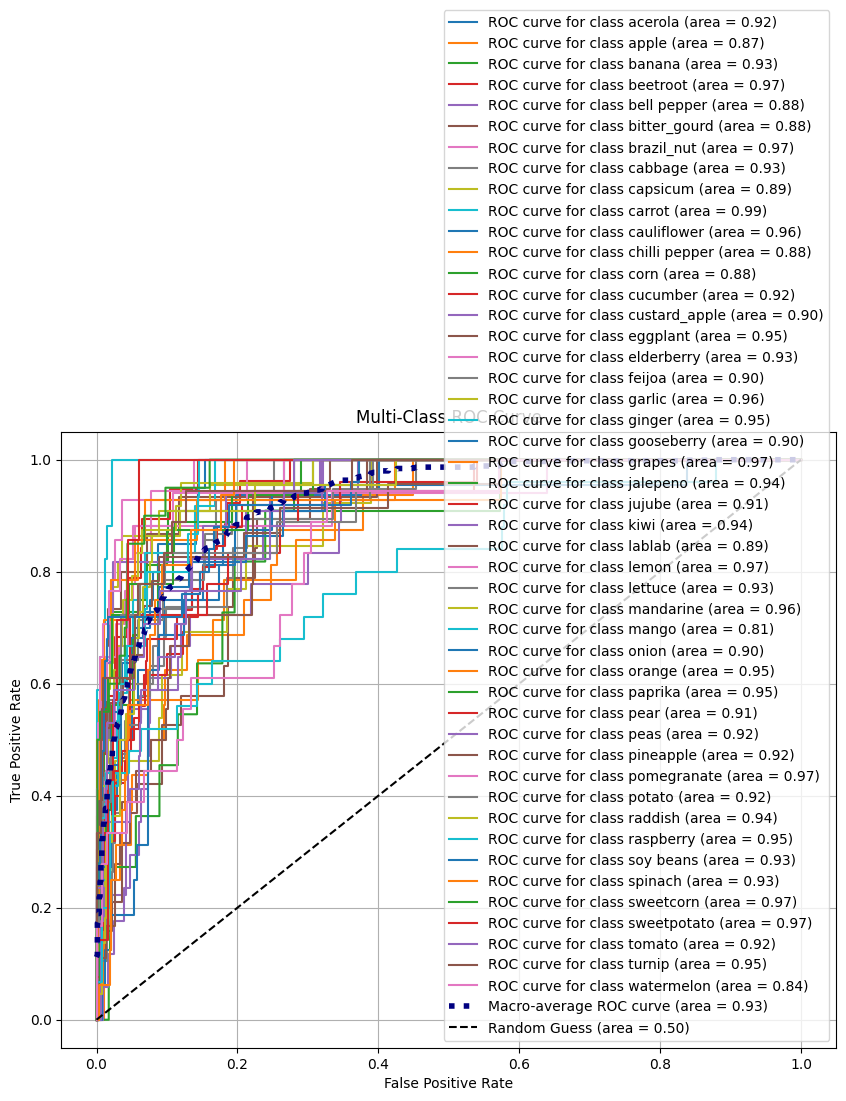

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_pred_prob = []
y_true = []

# Iterate over the validation dataset
for images, labels in val_ds:
    # Get predictions from the model
    preds = model.predict(images)  # Ensure this outputs probabilities
    
    # Append true labels and predicted probabilities
    y_true.extend(labels.numpy())
    y_pred_prob.extend(preds)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)

# Binarize the true labels for multi-class ROC computation
y_true_one_hot = label_binarize(y_true, classes=list(range(len(class_names))))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(class_names)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(class_names)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f"ROC curve for class {class_names[i]} (area = {roc_auc[i]:.2f})",
    )

# Plot macro-average ROC curve
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"Macro-average ROC curve (area = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

# Plot the random chance line
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (area = 0.50)")

# Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


REFERENCES: 
1. GeeksForGeeks
2. https://www.tensorflow.org/tutorials/images/classification